**PARTEA 1**


Cerinta 1: Cititi informatiile din fisierul train.csv si examinati structura acestora. Pentru acest lucru, trebuie să determinati programatic (utilizând cod Python) următoarele: numărul de coloane, tipurile datelor din fiecare coloană, numărul de valori lipsă pentru fiecare coloană, numărul de linii, dacă există linii duplicate.


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

TrainData = pd.read_csv('train.csv')

[rows, columns] = TrainData.shape

print(rows)
print(columns)

print(TrainData.info())

print(TrainData.info)


891
12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4         

**Cerinta 2**: Determinati care este procentul persoanelor care au supravietuit si procentul persoanelor care nu au supravietuit. Determinati care este procentul pasagerilor pentru fiecare tip de clasă (coloana Pclass). Determinati care este procentul bărbatilor si care este procentul femeilor. Realizati un grafic potrivit pentru prezentarea acestor rezultate.

Percentage of people who didn't survive: 61.62%
Percentage of 1st class: 24.24%
Percentage of 2nd class: 20.65%
Percentage of 3rd class: 55.11%


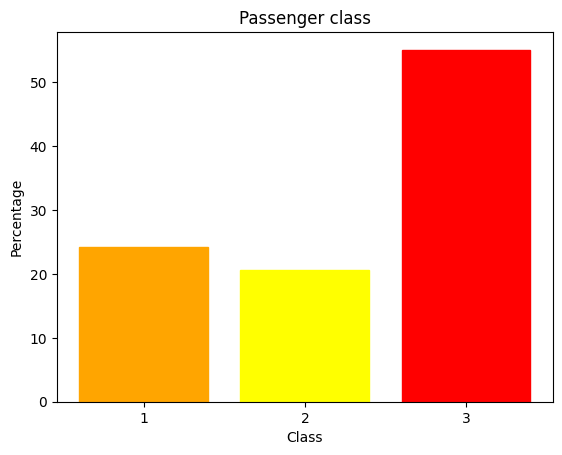

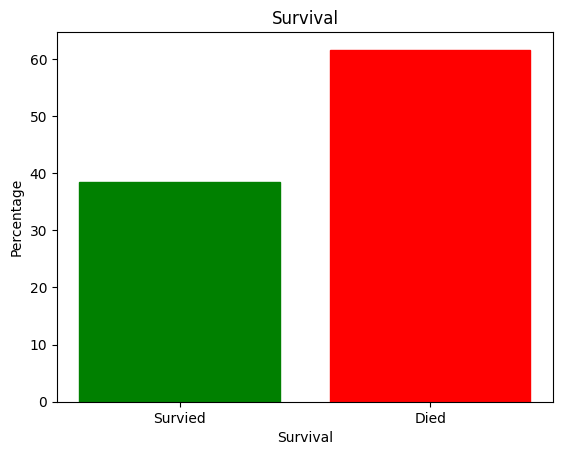

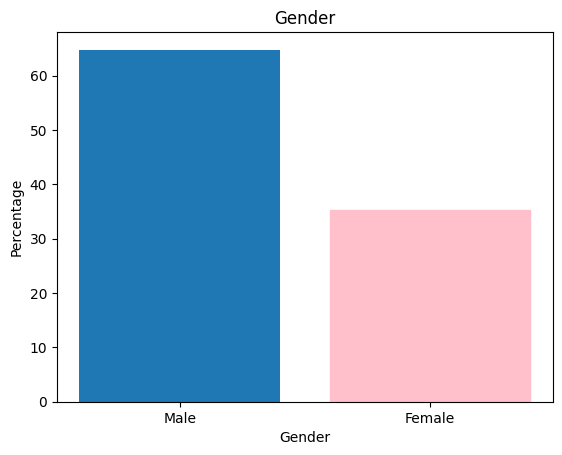

In [68]:
count = len(TrainData)

survived = (TrainData['Survived'].sum() / count) * 100
not_survived = 100 - survived

print(f"Percentage of people who didn't survive: {not_survived:.2f}%")


per_1 = (TrainData['Pclass'].value_counts()[1] / count) * 100
per_2 = (TrainData['Pclass'].value_counts()[2] / count) * 100
per_3 = (TrainData['Pclass'].value_counts()[3] / count) * 100

print(f"Percentage of 1st class: {per_1:.2f}%")
print(f"Percentage of 2nd class: {per_2:.2f}%")
print(f"Percentage of 3rd class: {per_3:.2f}%")



plt.bar(['1', '2', '3'], [per_1, per_2, per_3])


plt.xlabel("Class")
plt.ylabel("Percentage")
plt.title("Passenger class")


plt.gca().get_children()[2].set_color('red')
plt.gca().get_children()[1].set_color('yellow')
plt.gca().get_children()[0].set_color('orange')

plt.show()

plt.bar(['Survied', 'Died'], [survived, not_survived])
plt.xlabel("Survival")
plt.ylabel("Percentage")
plt.title("Survival")

plt.gca().get_children()[0].set_color('green')
plt.gca().get_children()[1].set_color('red')

plt.show()

male = (TrainData['Sex'].value_counts()["male"] / count) * 100
female = (TrainData['Sex'].value_counts()["female"] / count) * 100

plt.bar(['Male', 'Female'], [male, female])
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title("Gender")


plt.gca().get_children()[1].set_color('pink')
plt.show()

Cerinta 3: Această cerintă implică generarea de histograme pentru fiecare coloană cu valori numerice din setul de date Titanic. O histogramă este o reprezentare grafică a distributiei frecventelor unei variabile continue. Pe axa orizontală sunt incluse intervalele de valori ale variabilei, iar pe axa verticală se reprezintă numărul de exemple din setul de date care sunt incluse
în fiecare interval. Histograma oferă o imagine vizuală a modului în care valorile sunt distribuite si permite identificarea tendintelor si a modelului de distributie al datelor. În cadrul acestei cerinte, pentru fiecare coloană numerică din setul de date Titanic, se va realiza o histogramă pentru a vizualiza distributia datelor si a evidentia caracteristicile importante ale acestora.

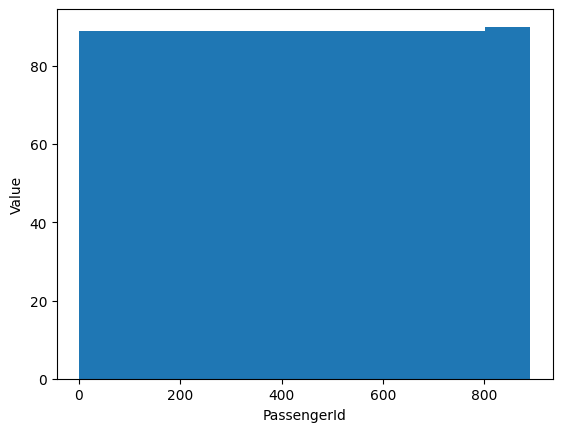

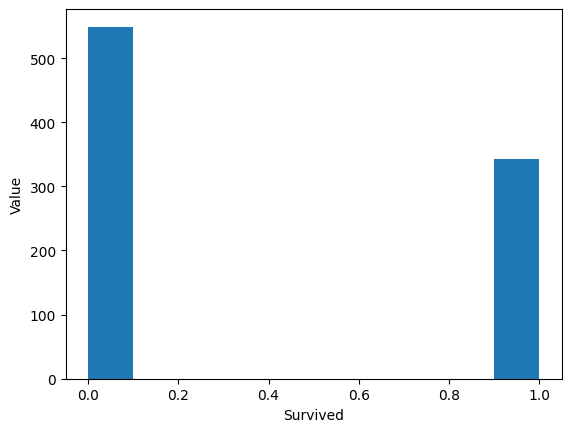

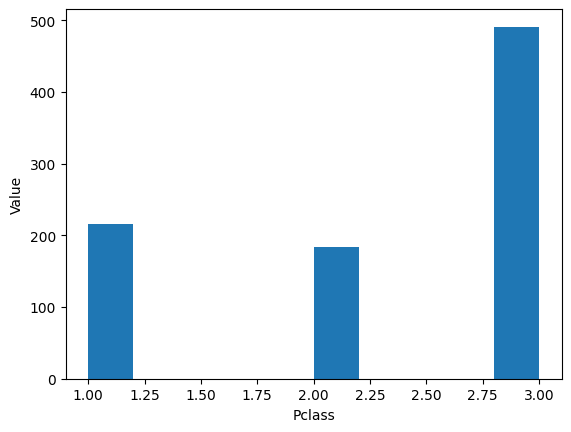

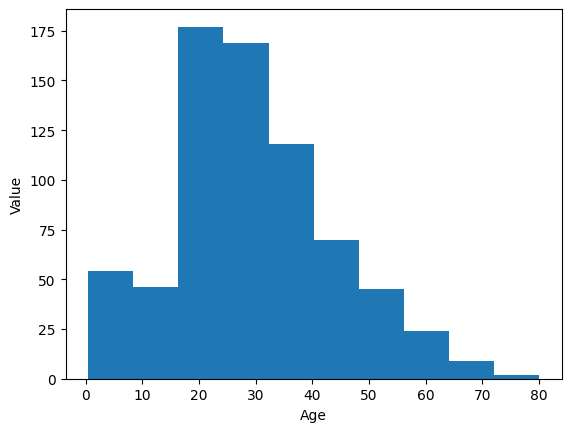

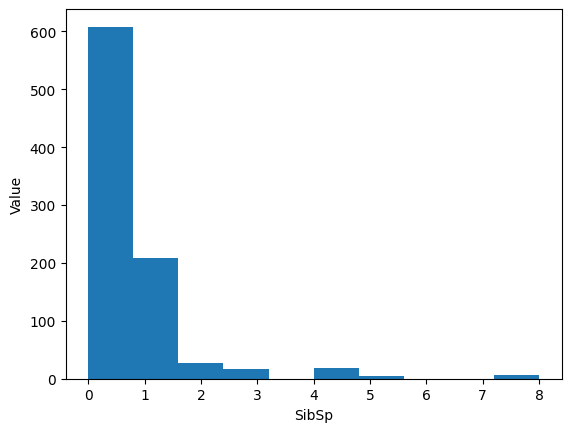

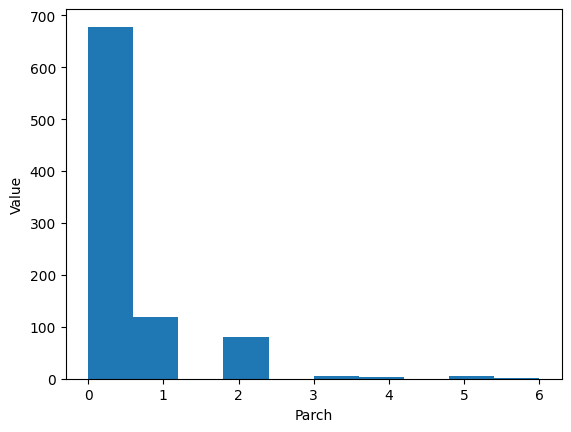

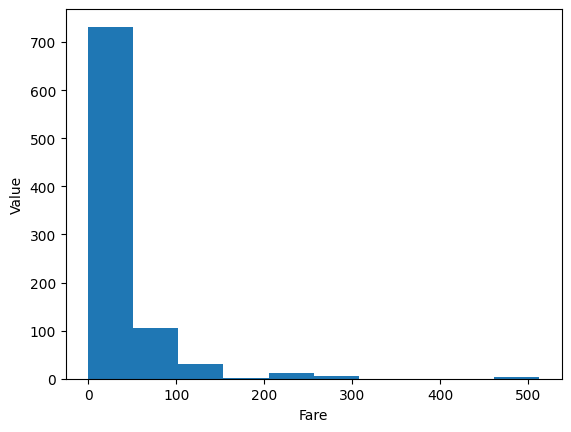

In [69]:
NumberData = TrainData.select_dtypes(include=[np.number])

for column in NumberData.columns:
  plt.hist(NumberData[column])
  plt.xlabel(column)
  plt.ylabel('Value')
  plt.show()

Cerinta 4: Identificati coloanele pentru care există valori lipsă. Apoi, pentru fiecare coloană identificată determinati numărul si proportia valorilor lipsă. Determinati care este procentul acestora pentru fiecare dintre cele două clase (coloana Survived).

In [70]:
#TrainData.isnull() - creaza dataframe nou cu valoare True daca acolo e valoare lipsa
# .any() - Atribuie fiecarei coloane o variabila bool, True daca exista vreun True pe coloana respectiva

col_list = TrainData.columns[TrainData.isnull().any()].tolist()
print(col_list)

survivedData = TrainData[TrainData['Survived'] == 1];
deadData = TrainData[TrainData['Survived'] == 0];

for col in col_list:
  sum = TrainData[col].isna().sum()
  proportie = sum / count
  procentSur = survivedData[col].isna().sum() / len(survivedData) * 100
  procentNeSur = deadData[col].isna().sum() / len(deadData) * 100
  print(f"Coloana {col} are {sum} valori lipsa, o proportie de {proportie:.2f}.\nPt cei care au supravietuit sunt {procentSur:.2f}% si pt restul un procent de {procentNeSur:.2f}%\n")

['Age', 'Cabin', 'Embarked']
Coloana Age are 177 valori lipsa, o proportie de 0.20.
Pt cei care au supravietuit sunt 15.20% si pt restul un procent de 22.77%

Coloana Cabin are 687 valori lipsa, o proportie de 0.77.
Pt cei care au supravietuit sunt 60.23% si pt restul un procent de 87.61%

Coloana Embarked are 2 valori lipsa, o proportie de 0.00.
Pt cei care au supravietuit sunt 0.58% si pt restul un procent de 0.00%



Cerinta 5: Considerăm patru categorii de vârstă: [0, 20], [21, 40], [41, 60], [61, max]. Determinati câti pasageri avem pentru fiecare din această categorie. Introduceti o coloană suplimentară si determinati pentru fiecare exemplu din setul de date indexul categoriei din care face parte.
Realizati un grafic potrivit pentru a evidentia aceste rezultate.

Sunt 179 de persoane cu varsta pana in 20 de ani
Sunt 385 de persoane cu varsta intre 21 si 40 de ani
Sunt 128 de persoane cu varsta intre 41 si 60 de ani
Sunt 22 de persoane cu varsta mai mare de 60 de ani


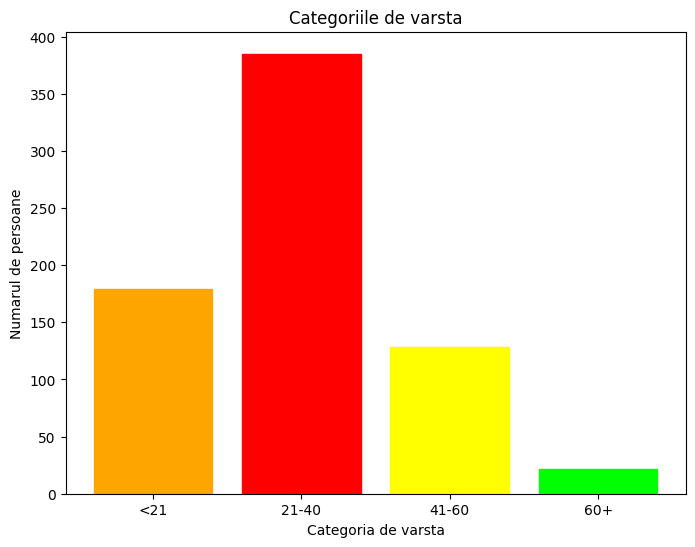

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [71]:
#obtin dataframe cu fiecare categorie de varsta separat

young_people = TrainData[TrainData['Age'] <= 20]
print(f"Sunt {len(young_people)} de persoane cu varsta pana in 20 de ani")

adults = TrainData[(TrainData['Age'] > 20) & (TrainData['Age'] <= 40)]
print(f"Sunt {len(adults)} de persoane cu varsta intre 21 si 40 de ani")

middle_age = TrainData[(TrainData['Age'] > 40) & (TrainData['Age'] <= 60)]
print(f"Sunt {len(middle_age)} de persoane cu varsta intre 41 si 60 de ani")

old = TrainData[(TrainData['Age'] > 60)]
print(f"Sunt {len(old)} de persoane cu varsta mai mare de 60 de ani")

age_groups = ['<21', '21-40', '41-60', '60+']
counts = [len(young_people), len(adults), len(middle_age), len(old)]

#fac grafic colorat

plt.figure(figsize=(8, 6))
plt.bar(age_groups, counts)

plt.xlabel('Categoria de varsta')
plt.ylabel('Numarul de persoane')
plt.title('Categoriile de varsta')
plt.gca().get_children()[1].set_color('red')
plt.gca().get_children()[0].set_color('orange')
plt.gca().get_children()[2].set_color('yellow')
plt.gca().get_children()[3].set_color('lime')
plt.show()


age_group_dfs = [young_people, adults, middle_age, old]
age_bins = [0, 21, 41, 61, float('inf')]

#adaug coloana noua
TrainData['AgeGroup'] = pd.cut(TrainData['Age'], bins=age_bins, labels=[1, 2, 3, 4], right=False)
print(TrainData.info)

#iau iar nr de valori din coloana noua si fac grafic
#age_21 = TrainData['AgeGroup'].value_counts()['<21']
#age_41 = TrainData['AgeGroup'].value_counts()['21-40']
#age_61 = TrainData['AgeGroup'].value_counts()['41-60']
#age_inf = TrainData['AgeGroup'].value_counts()['60+']
#plt.bar(age_groups, [age_21, age_41, age_61, age_inf])
#plt.show()

Cerinta 6: Determinati câti bărbati au supravietuit pentru fiecare dintre cele 4 categorii de vârstă propuse anterior. Realizati un grafic în care să evidentiati cum influentează vârsta procentul de supravietuire al bărbatilor, pe baza informatiilor pe care le avem în setul de date.


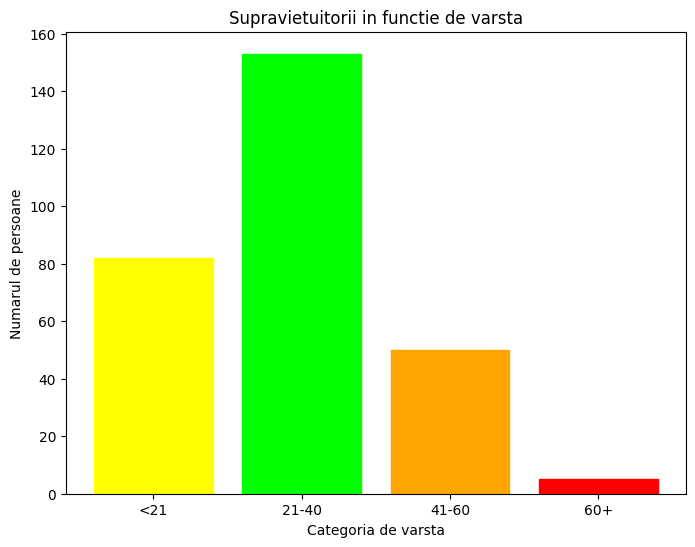

,AgeGroup,Survived,Age
AgeGroup,1.000000,-0.068878,0.914957
Survived,-0.068878,1.000000,-0.077221
Age,0.914957,-0.077221,1.000000


In [72]:
young_s = young_people['Survived'].sum()
adults_s = adults['Survived'].sum()
middle_s = middle_age['Survived'].sum()
old_s = old['Survived'].sum()

plt.figure(figsize=(8, 6))
plt.bar(age_groups, [young_s, adults_s, middle_s, old_s])

plt.xlabel('Categoria de varsta')
plt.ylabel('Numarul de persoane')
plt.title('Supravietuitorii in functie de varsta')
plt.gca().get_children()[3].set_color('red')
plt.gca().get_children()[2].set_color('orange')
plt.gca().get_children()[0].set_color('yellow')
plt.gca().get_children()[1].set_color('lime')
plt.show()

TrainData[['AgeGroup', 'Survived', 'Age']].corr()